__
___
We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Importing the usual libraries for pandas and plotting.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold

%matplotlib inline

## Get the Data



In [2]:
df = pd.read_csv('D:/Py_DS_ML_Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests/loan_data.csv')

In [3]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

Let's do some data visualization!


<AxesSubplot:xlabel='fico', ylabel='Count'>

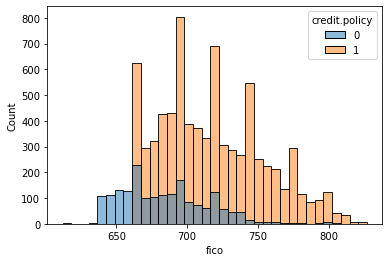

In [5]:
sns.histplot(x='fico',data=df,bins=35,hue='credit.policy')

<AxesSubplot:xlabel='fico', ylabel='Count'>

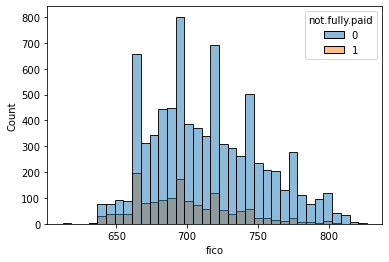

In [6]:
sns.histplot(x='fico',data=df,bins=35,hue='not.fully.paid')

<AxesSubplot:xlabel='purpose', ylabel='count'>

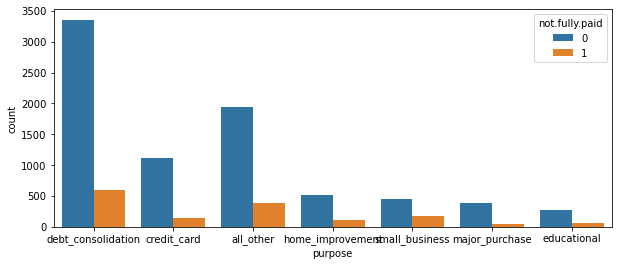

In [7]:
plt.figure(figsize=(10,4))
sns.countplot(x='purpose',data=df,hue='not.fully.paid')

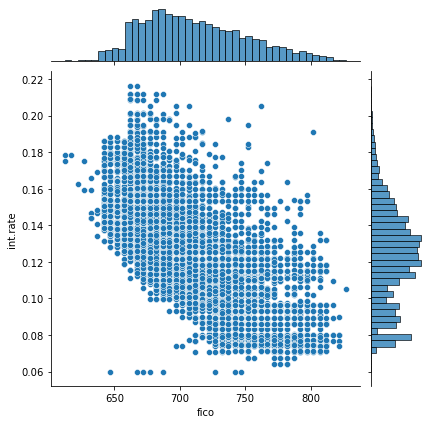

In [8]:
sns.jointplot(x='fico',y='int.rate',data=df)

<AxesSubplot:>

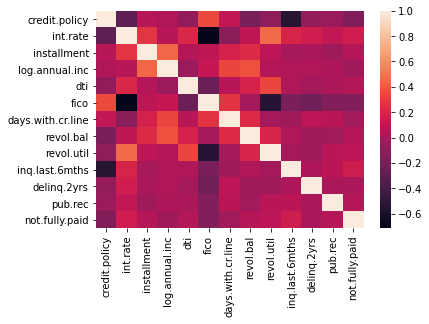

In [9]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Handling Missing values.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [12]:
# No missing values.

## Categorical Features

Notice that the **purpose** column as categorical


In [13]:
df1=pd.get_dummies(df['purpose'],drop_first=True)

In [14]:
df= pd.concat([df,df1],axis=1)

In [15]:
df.drop(['purpose'],axis=1,inplace=True)

In [16]:
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,credit_card,debt_consolidation,educational,home_improvement,major_purchase,small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


In [38]:
df['not.fully.paid'].value_counts()
# imabalenced data set so smote and k-stratified fold is applied.

0    8045
1    1533
Name: not.fully.paid, dtype: int64

## Train Test Split



In [17]:
from sklearn.model_selection import StratifiedKFold

In [18]:
X= df.drop(['not.fully.paid'],axis=1)
y= df['not.fully.paid']

Importing reports and curves for prediction.

In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [22]:
from sklearn.ensemble import RandomForestClassifier
import imblearn
from imblearn.over_sampling import SMOTE

In [23]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in range(200,2000,200)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [24]:
kf = StratifiedKFold(n_splits=5)

smoter = SMOTE(random_state=42)
i=0 
j=0
scores = []
for train_index, test_index in kf.split(X,y):

    X_train=X.iloc[train_index]
    X_test=X.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]
    print(X_train.shape)
    print(y_train.shape)
    for x in y_train:
        if x==1:
            i=i+1
    print(i)
    for x in y_train:
        if x==0:
            j=j+1
    print(j)
    X_train_fold_upsample, y_train_fold_upsample = smoter.fit_resample(X_train,
                                                                           y_train)
    rf=RandomForestClassifier()
    rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    rf.fit(X_train_fold_upsample, y_train_fold_upsample)
    pred = rf.predict(X_test)
    print(classification_report(y_test,pred))
    score=accuracy_score(pred,y_test)

(7662, 18)
(7662,)
1226
6436
Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1609
           1       0.25      0.06      0.09       307

    accuracy                           0.82      1916
   macro avg       0.54      0.51      0.50      1916
weighted avg       0.75      0.82      0.77      1916

(7662, 18)
(7662,)
2452
12872
Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1609
           1       0.17      0.07      0.10       307

    accuracy                           0.80      1916
   macro avg       0.51      0.50      0.49      1916
weighted avg       0.73      0.80      0.76      1916

(7662, 18)
(7662,)
3678
19308
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1609
           1       0.21      0.07      0.10       307

    accuracy                           0.81      1916
   macro avg       0.53      0.51      0.50      1916
weighted avg       0.74      0.81      0.77      1916

(7663, 18)
(7663,)
4905
25744
Fitting 3 folds for each of 10 candidates, totalling 30 fits
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1609
           1       0.18      0.12      0.14       306

    accuracy                           0.77      1915
   macro avg       0.51      0.51      0.51      1915
weighted avg       0.74      0.77      0.75      1915

(7663, 18)
(7663,)
6132
32180
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\chand\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       1.00      0.15      0.25      1609
           1       0.18      1.00      0.31       306

    accuracy                           0.28      1915
   macro avg       0.59      0.57      0.28      1915
weighted avg       0.87      0.28      0.26      1915



## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [25]:
ytest_pred=rf.predict_proba(X_test)

In [26]:
pos_probs = ytest_pred[:, 1]

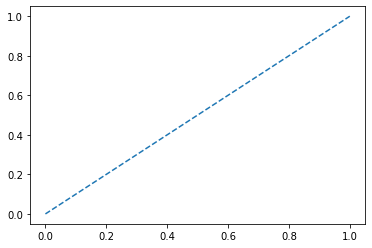

In [27]:
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

In [28]:
fpr, tpr, _ = roc_curve(y_test, pos_probs)

Text(0, 0.5, 'True Positive Rate')

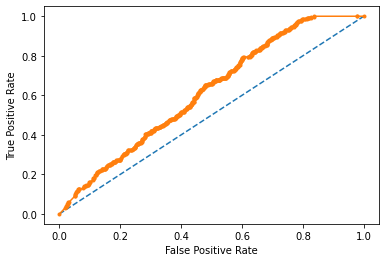

In [29]:
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='rf')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [30]:
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF test roc-auc: 0.6183914419299934


In [31]:
pred=rf.predict(X_test)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.15      0.25      1609
           1       0.18      1.00      0.31       306

    accuracy                           0.28      1915
   macro avg       0.59      0.57      0.28      1915
weighted avg       0.87      0.28      0.26      1915



In [34]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost test roc-auc: 0.662992481019754


Text(0, 0.5, 'True Positive Rate')

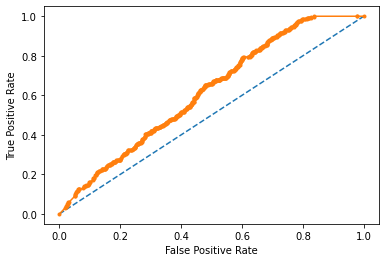

In [35]:
ytest_pred=rf.predict_proba(X_test)
pos_probs = ytest_pred[:, 1]
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='ab')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [36]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      0.15      0.25      1609
           1       0.18      1.00      0.31       306

    accuracy                           0.28      1915
   macro avg       0.59      0.57      0.28      1915
weighted avg       0.87      0.28      0.26      1915



In [ ]:
kf =KFold(n_splits=5)
for train_index, test_index in kf.split(X,y):

    X_train=X.iloc[train_index]
    X_test=X.iloc[test_index]
    y_train=y.iloc[train_index]
    y_test=y.iloc[test_index]
    xg = XGBClassifier(random_state=123)
    xg = RandomizedSearchCV(estimator = xg, param_distributions = params, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
    xg.fit(X_train, y_train)
    pred = rf.predict(X_test)
    print(classification_report(y_test,pred))
    score=accuracy_score(pred,y_test)